In [1]:
from sklearn.datasets.samples_generator import make_blobs
from random import *

centers = []
for i in range(5):
    x = randint(-10, 10)
    y = randint(-10, 10)
    z = randint(-10, 10)
    centers.append([x, y, z])

#centers = [[2, 2], [8, 9], [9, 5], [3,9],[4,4],[0,0],[2,5]]
X, y = make_blobs(n_samples=5000, n_features=3, centers=centers, cluster_std=0.8, center_box=(1, 10.0), shuffle=True, random_state=0)

print(X[:, 0])
print(y)

In [2]:
import matplotlib.pyplot as plt

#set colors for the clusters
colors = ['r','g','b','c','k','y','m']
c = []
for i in y:
    c.append(colors[i])
    


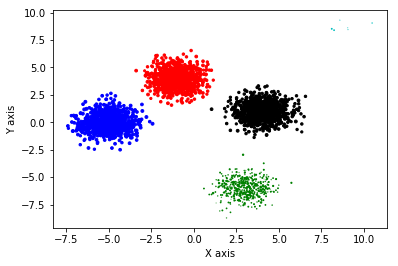

In [4]:
plt.scatter(X[:, 0], X[:, 1], X[:, 2], c= c)
plt.gray()
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

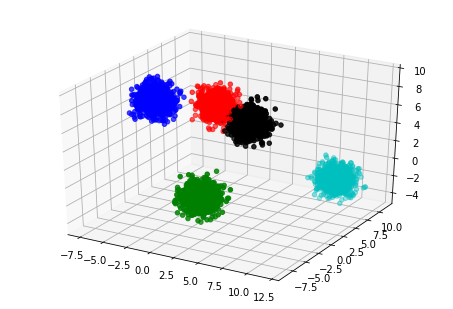

In [23]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot
import numpy as np

fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = c)
pyplot.show()